1. Veri okuma

In [1]:
import pandas as pd

# Dengelenmiş eğitim setini oku
train_df = pd.read_csv("dataset/train_balanced.csv")

# Test setini oku
test_df = pd.read_csv("dataset/test_scaled.csv")

# Özellik ve etiket ayır
X_train_resampled = train_df.drop("Class", axis=1)
y_train_resampled = train_df["Class"]

X_test_scaled = test_df.drop("Class", axis=1)
y_test = test_df["Class"]

2. PCA ile boyut azaltma ve .csv kaydetme

In [2]:
from sklearn.decomposition import PCA

# PCA oluştur – %95 varyansı koruyacak kadar bileşen
pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train_resampled)
X_test_pca = pca.transform(X_test_scaled)

# Boyutları yazdır
print("Orijinal boyut:", X_train_resampled.shape[1])
print("PCA sonrası boyut:", X_train_pca.shape[1])

Orijinal boyut: 30
PCA sonrası boyut: 12


In [3]:
# PCA uygulanmış eğitim seti
pd.DataFrame(X_train_pca).to_csv("dataset/train_pca.csv", index=False)
pd.DataFrame(y_train_resampled).to_csv("dataset/y_train_pca.csv", index=False)

# PCA uygulanmış test seti
pd.DataFrame(X_test_pca).to_csv("dataset/test_pca.csv", index=False)
pd.DataFrame(y_test).to_csv("dataset/y_test_pca.csv", index=False)

3. PCA bileşen sayısı

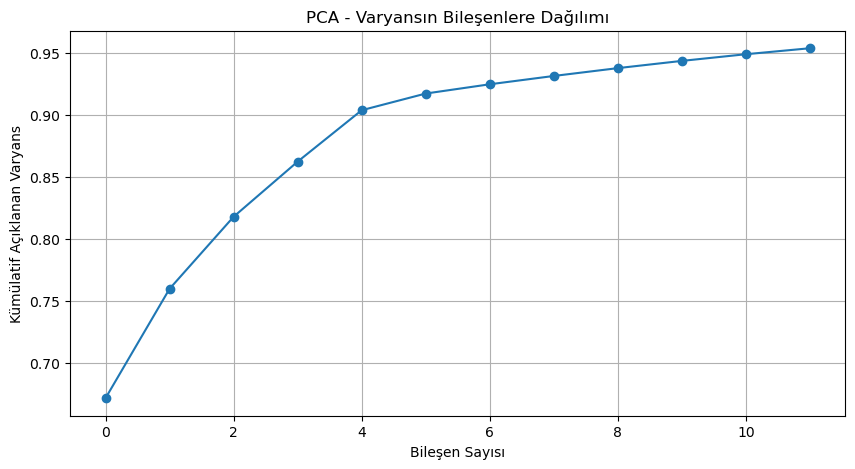

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Varyans oranlarını çiz
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel("Bileşen Sayısı")
plt.ylabel("Kümülatif Açıklanan Varyans")
plt.title("PCA - Varyansın Bileşenlere Dağılımı")
plt.grid()
plt.show()